In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Bitcoin_tweets.csv")

c:\users\ericv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,no_punc
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted by nyse after b...
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today that s this thursday we will do a ...
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"guys evening, i have read this article about b...",NaN,Twitter Web App,False,guys evening i have read this article about b...
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$btc a big chance in a billion! price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc a big chance in a billion price 487264...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,this network is secured by 9 508 nodes as of t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434032,Bitcoin⚡️,Blockchain,A pleb who likes to tweet about #Bitcoin & the...,2021-04-16 19:51:49,343.0,235.0,335.0,False,2022-03-06 14:43:02,the latest #bitcoin block 726142 with 563 tran...,"['bitcoin', 'Bitcoin', 'BTC', 'blockchain', 'a...",Bitcoin CMO,False,the latest bitcoin block 726142 with 563 tran...
2434033,Ajith,NaN,NaN,2021-09-30 15:35:30,74.0,130.0,13464.0,False,2022-03-06 14:43:00,@moodyowlnft #creoengine\ndeveloping and deplo...,"['creoengine', 'Decentralised', 'NFT', 'creo',...",Twitter for Android,False,moodyowlnft creoengine\ndeveloping and deplo...
2434034,AR.eth,NaN,#Bitcoin\nSophomore @IITKGP\nGetting back on t...,2021-12-13 11:03:02,26.0,164.0,169.0,False,2022-03-06 14:42:57,12. examples of blockchains:\n\nbitcoin networ...,"['BTC', 'ETH', 'SOL']",Twitter Web App,False,12 examples of blockchains \n\nbitcoin networ...
2434035,ángel Jácobo,Austin,⚡𝐉𝐚𝐜𝐨𝐛𝐨⚡ #bitcoin\n\n#NoSoyFácilSabes,2019-12-27 18:11:24,16.0,282.0,332.0,False,2022-03-06 14:42:56,this amazing faucet from @_bitcoiner is making...,"['Bitcoin', 'BTC', 'LN', 'LightningNetwork', '...",Twitter Web App,False,this amazing faucet from _bitcoiner is making...


In [6]:
sent = pd.read_csv('vader_lexicon.txt', sep="\t", index_col=0, header = None, usecols=[0,2], names=['lexicon', 'value'])

df['text']= df['text'].str.lower() #lowercase

punct_re = r'[^\w\s]'
df['no_punc'] = df['text'].str.replace(punct_re, ' ') #get rid of punctuation

tidy_format = df['no_punc'].str.split(expand=True).stack().reset_index(level=1) #tidy format
tidy_format.columns = ['num', 'word'] 

a = tidy_format.merge(sent, how = 'left', left_on="word", right_index = True).reset_index()
a = a.groupby('index').sum()
df['value'] = a[['value']]
df = df.fillna(0)
df.head()


c:\users\ericv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,no_punc,value
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted by nyse after b...,0.87178
1,CryptoND,0,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today that s this thursday we will do a ...,1.40000
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"guys evening, i have read this article about b...",0,Twitter Web App,False,guys evening i have read this article about b...,1.41915
3,Crypto is the future,0,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$btc a big chance in a billion! price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc a big chance in a billion price 487264...,0.77460
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,this network is secured by 9 508 nodes as of t...,1.45184


In [7]:
print('Most negative tweets:')
for t in df.sort_values('value').head()['text']:
    print('\n  ', t)

Most negative tweets:

   $unity 
#unitycol #unityprotocol 
@nq99nadeem 
@binancechain 
@gillaniayat 
@unitycol 
#bnb #doge #bitcoin #matic #polygon #babygode #safemoon https://t.co/kkqiatkfnd

   #bitcoin update ! https://t.co/jsisp9ucb1

   thoughts on $btc #bitcoin! see glatran35's idea on tradingview below. https://t.co/vgile2xmfk trade it here: https://t.co/hak6tqgbkx

   @imfnews #bitcoin fixes this

   that's how it sounds when activating your #cat replicant for a next #crypto mining mission #catsoftwitter #bladerunner #bitcoin https://t.co/h4ocilgilf


In [8]:
print('Most positive tweets:')
for t in df.sort_values('value', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！no war  ！

 #ukrainewar  #russian   #russiaukraineconflict    #btc   #ethereum   #usa

   no risk, no reward #bitcoin
no pain, no growth
no trauma,  no depth
no honesty, no clarity
no discipline, no talent
no trust, no relationship
no commitment, no love
no investment, no wealth
no courage, no self-esteem
no self-confidence, no peace
no imagination, no opportunity

   @cryptogodjohn &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;
☀️🐚🏝crypto island🏝🐚☀️
🥂become a co-owner today🥂
&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;
⚓️😎⚓️see ya’ll there ⚓️😎⚓️
💯🌴💯🌴 $cisla. 🌴💯🌴💯
&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;

#cryptoislandgroup #crypto
#cisla #cislaarmy #cisl

In [9]:
from datetime import datetime


In [10]:
#We will now compare i to the NLTK tokenizer , and decide how to move forward
df_line = df[["date", "value"]]
df_line["date"] = pd.to_datetime(df_line['date'], errors='coerce').dt.date.fillna('NA').dropna()

c:\users\ericv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
pd.to_datetime('2017-01-01').date()

datetime.date(2017, 1, 1)

In [12]:
df_grouped = df_line.groupby(["date"]).mean()
df_grouped = df_grouped.reset_index()
df_grouped["date"] = pd.to_datetime(df_grouped['date'], errors='coerce')

In [13]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    122 non-null    datetime64[ns]
 1   value   123 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


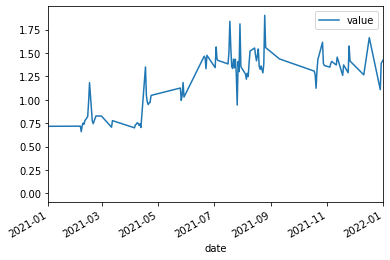

In [15]:
import matplotlib.pyplot as plt
import numpy as np

df_grouped.plot(x="date")
plt.xlim(['2021-01-01', '2022-01-01'])
plt.show()

In [16]:
 #df_grouped.to_csv(r'C:\Users\ericv\Documents\gtech\DVA\bitcoin_tweets_vadered.csv', index = False)